In [1]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import pandas as pd
%ls Data

high.csv  highp_finalresults.csv  low.csv  lowp_finalresults.csv


# Formatting

In [2]:
# Loads data (Fills NaN values as 0 for simplicity)
data=pd.read_csv("./Data/highp_finalresults.csv",sep = ',',
                 engine = 'python',skipinitialspace = True,na_values = 'NaN ').fillna(0)
# Each row, (for now is a different planet)
# Adds column named n_planet___ it is later going to be summed
data["n_planets"] = 1
# Shows data for verification
print(data.shape)
#data['rplanet(i)/radtie'][26720]
data.head()

(32465, 19)


,ident,it,t,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,n_planets
0,0,199993,20000001.0,0.030237,0.004911,1.904923,1.902982,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
1,0,199993,20000001.0,0.818832,0.000238,1.642056,1.815005,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
2,0,199993,20000001.0,2.124022,0.000000,1.786051,1.865992,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
3,0,199993,20000001.0,5.123330,0.000000,0.843418,1.453885,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1
4,0,199993,20000001.0,6.932367,0.000000,0.477013,1.203113,4.368174e+32,59.88237,1.110726,51.287674,0.13,1.0,0.3,1.0,0.1,0.07707,9268935.0,1


In [3]:
# Selects planet data only. 
# According to repository readme: a(i),emegas(i),emepla(i)/emed,rplanet(i)/radtie
# Identity of system is conserved
planet_data = data[['ident','a(i)','emegas(i)','emepla(i)/emet','rplanet(i)/radtie','n_planets']]
# Shows data
print(planet_data.shape)
planet_data.head(5)

(32465, 6)


,ident,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,n_planets
0,0,0.030237,0.004911,1.904923,1.902982,1
1,0,0.818832,0.000238,1.642056,1.815005,1
2,0,2.124022,0.000000,1.786051,1.865992,1
3,0,5.123330,0.000000,0.843418,1.453885,1
4,0,6.932367,0.000000,0.477013,1.203113,1


In [4]:
# Selects system data only. 
# System columns are the ones that are not just planet data
system_data = data.drop(['a(i)','emegas(i)','emepla(i)/emet','rplanet(i)/radtie','n_planets'],1)
# Shows data
print(system_data.shape)
system_data.head(15)

(32465, 14)


,ident,it,t,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas
0,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
1,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
2,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
3,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
4,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
5,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
6,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
7,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
8,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0
9,0,199993,20000001.0,4.368174e+32,59.882370,1.110726,51.287674,0.130,1.0,0.3,1.0,0.1,0.077070,9268935.0


In [5]:
# System data is repeated as rows represent planets
system_data = system_data.groupby(system_data['ident']).mean()
# From planets data it is only necesary the total data (total mass, total number of planets etc)
planet_data = planet_data.groupby(planet_data['ident']).sum()
print(planet_data.head())
print(system_data.head())


             a(i)  emegas(i)  emepla(i)/emet  rplanet(i)/radtie  n_planets
ident                                                                     
0       88.367184   0.005149        8.136583          13.799422         11
1       19.929930   0.000006        2.827470          10.867257         13
2      107.707786   0.001665        7.979543           9.507665          9
3       21.379942   0.000227        6.944855          17.738895         18
4       25.873853   0.000010        3.193649           9.081374         10
           it           t       emestar         rc      qest   sigmag_0  \
ident                                                                     
0      199993  20000001.0  4.368174e+32  59.882370  1.110726  51.287674   
1      198840  20000001.0  2.095099e+32  40.040195  3.201758  16.765976   
2      199995  20000001.0  5.354890e+32  40.647163  1.965345  67.644768   
3      199755  20000001.0  3.614768e+32  29.539343  9.568532  16.213096   
4      199319  20000001.0

In [6]:
# Concatenate two data frames to obtain final formatted data
data = pd.concat([system_data,planet_data], axis=1).reset_index()
# Shows data
print(data.shape)
data.tail()


(2770, 19)


,ident,it,t,emestar,rc,qest,sigmag_0,emed,gama,apert,fpert,constmigI,emetal,taugas,a(i),emegas(i),emepla(i)/emet,rplanet(i)/radtie,n_planets
2765,2968,131434,20000001.0,6.264712e+32,57.281631,10.953638,7.760851,0.0180,1.0,0.3,1.0,0.1,-0.446968,6626384.50,13.682752,0.000000e+00,0.400977,4.143484,7
2766,2969,198175,20000001.0,2.237603e+32,50.125561,3.832385,10.134950,0.0180,1.0,0.3,1.0,0.1,-0.057743,2354191.25,21.215692,3.096262e-09,2.108401,12.465113,17
2767,2971,174606,20000001.0,2.363279e+32,48.088692,7.702361,5.689376,0.0093,1.0,0.3,1.0,0.1,-0.038426,3613139.75,6.465147,0.000000e+00,0.406267,3.313046,5
2768,2973,199881,20000001.0,5.544265e+32,43.687119,3.474783,34.838437,0.0470,1.0,0.3,1.0,0.1,-0.170853,8957744.00,38.762020,1.495763e-01,9.160190,13.220437,10
2769,2974,199875,20000001.0,4.092467e+32,50.698605,6.853647,9.907135,0.0180,1.0,0.3,1.0,0.1,0.408212,7710610.50,31.813141,8.450051e-04,8.499508,10.192397,9


# Looking for relations
Planet mass is presented as logarithm as always

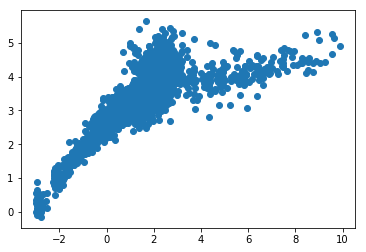

In [9]:
raw = data.values.T
plt.scatter(np.log(raw[16]),np.log(raw[14]))
plt.show()
# Logarithmic relation????????????????

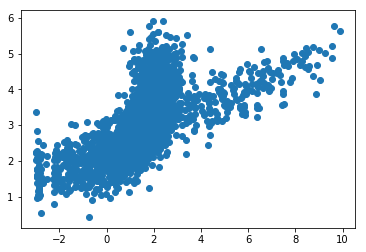

In [10]:
plt.scatter(np.log(raw[16]),np.log(raw[6]))
plt.show()

# Logarithmic relation

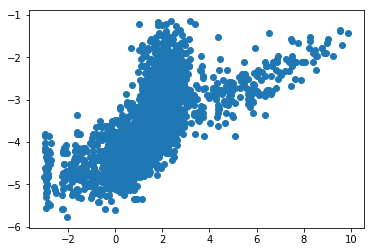

In [13]:
plt.scatter(np.log(raw[16]),np.log(raw[7]))
plt.show()

# Almost linear relation

In [358]:
data.keys()[[6,7,14,16]]

Index(['sigmag_0', 'emed', 'a(i)', 'emepla(i)/emet'], dtype='object')

# There is a relation between sigma_0 and emed!!!

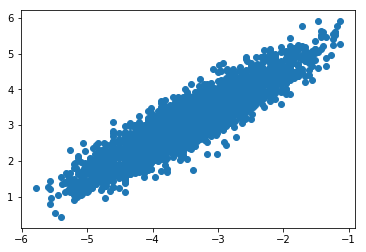

In [14]:
plt.scatter(np.log(raw[7]),np.log(raw[6]))
plt.show()

# clear linear relation!

# Extremely unimportant parameters

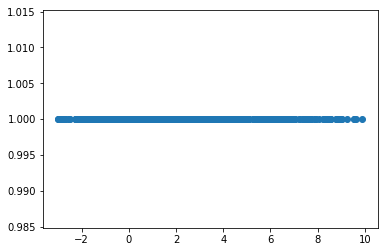

0.0


'gama'

In [15]:
plt.scatter(np.log(raw[16]),(raw[8]))
plt.show()
print(raw[8].std())
data.keys()[8]

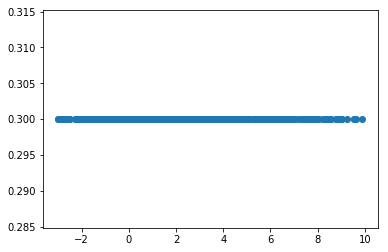

0.0


'apert'

In [16]:
plt.scatter(np.log(raw[16]),(raw[9]))
plt.show()

print(raw[9].std())
data.keys()[9]

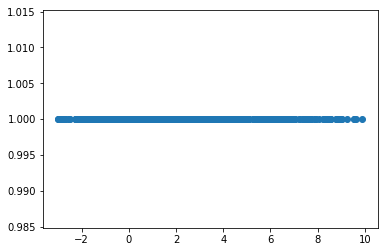

0.0


'fpert'

In [17]:
plt.scatter(np.log(raw[16]),(raw[10]))
plt.show()

print(raw[10].std())
data.keys()[10]

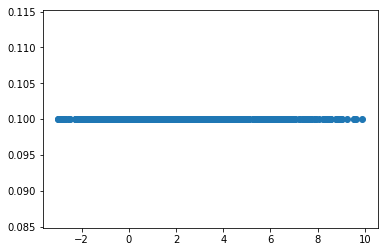

2.18633501151e-17


'constmigI'

In [18]:
plt.scatter(np.log(raw[16]),(raw[11]))
plt.show()

print(raw[11].std())
data.keys()[11]

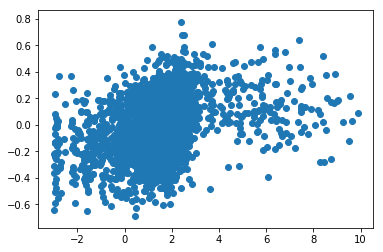

'emetal'

In [19]:
plt.scatter(np.log(raw[16]),(raw[12]))
plt.show()

data.keys()[12]

<IPython.core.display.Javascript object>


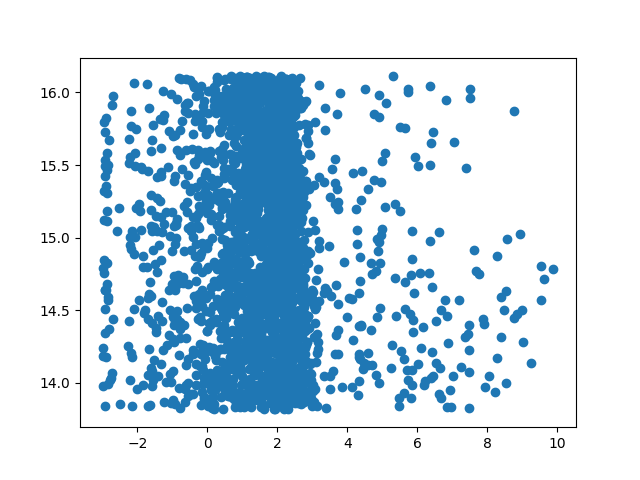

'taugas'

In [44]:
plt.scatter(np.log(raw[16]),np.log(raw[13]))
plt.show()

data.keys()[13]
# Interesting

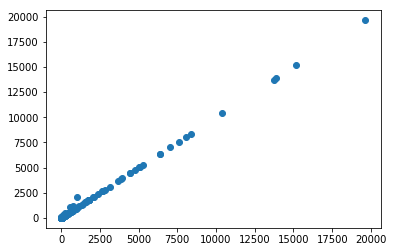

'emegas(i)'

In [21]:
plt.scatter((raw[16]),(raw[15]))
plt.show()

data.keys()[15]
# super perfect linear

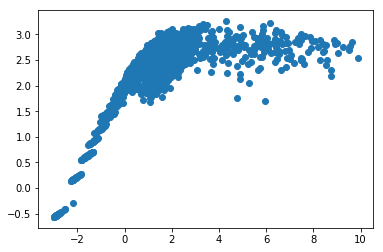

'rplanet(i)/radtie'

In [22]:
plt.scatter(np.log(raw[16]),np.log(raw[17]))
plt.show()

data.keys()[17]
# Nice

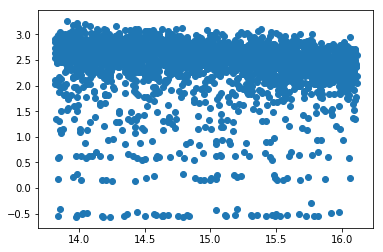

'rplanet(i)/radtie'

In [23]:
plt.scatter(np.log(raw[13]),np.log(raw[17]))
plt.show()
# This really does not matter
data.keys()[17]
# Nice

<IPython.core.display.Javascript object>


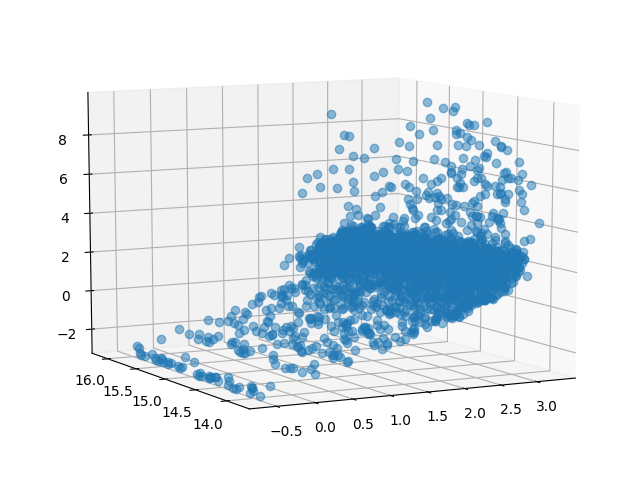

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
%matplotlib notebook
fig = plt.figure()
ax = Axes3D(fig)
#ax.scatter(np.log(raw[16]),np.log(raw[13]),np.log(raw[17]))
def update_lines(num, lines):
    # NOTE: there is no .set_data() for 3 dim data...
    ax.view_init(elev=10., azim=2*num)
    return lines
xx = np.log(raw[17])
yy = np.log(raw[13])
zz = np.log(raw[16])
lines = [ax.plot(xx, yy, zz, marker='o', alpha = 0.5,linewidth=0)[0]]

line_ani = animation.FuncAnimation(fig, update_lines, 155, fargs=( lines),
                                   interval=150, blit=False)


In [37]:
data.keys()[[13,16,17]]

Index(['taugas', 'emepla(i)/emet', 'rplanet(i)/radtie'], dtype='object')

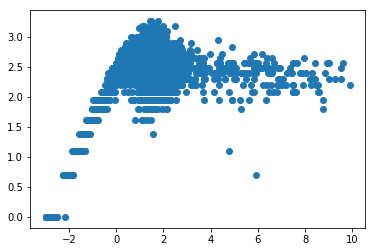

'n_planets'

In [52]:
%matplotlib inline
plt.scatter(np.log(raw[16]),np.log(raw[18]))
plt.show()

data.keys()[18]

<IPython.core.display.Javascript object>


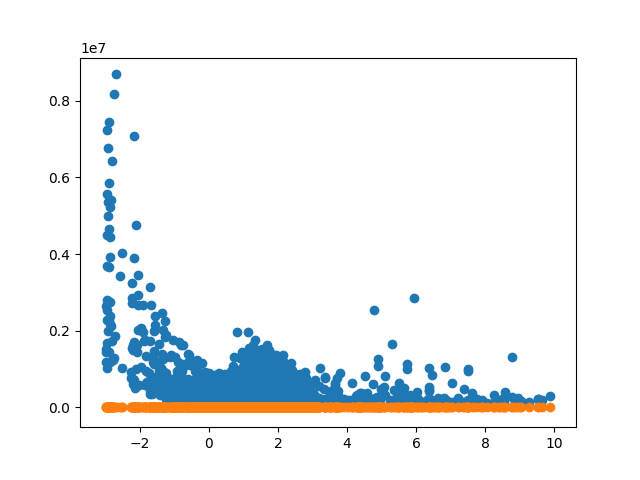

# Principal component analysis
As the README.md says, there are 4 non importatn parameters for each system, 5 if we count the identity parameter.
For this reason, we decide to reduce de dimensionality of this system by 5, using PCA form scikit learn.

In [ ]:
# Corresponding imports from scikit learn
from sklearn.decomposition import PCA
# Number of principal components to take
ndim = 19-5
